In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [12]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Power_P1", "Power_P2", "Water_Height", "Outflow"]

In [13]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [14]:
# Read in the data PST
pump = "PST233"
year = "2021"
month = "August"

pump = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
pump.columns = columns
pump["DateTime"] = pd.to_datetime(pump["DateTime"], format="%d-%m-%Y %H:%M:%S,%f")

In [15]:
pump["Volume"] = water_level_to_volume(pump["Water_Height"], "PST237")

In [16]:
pump

,DateTime,Power_P1,Power_P2,Water_Height,Outflow,Volume
0,2021-08-01 00:00:00.000,0.0,0.0,0.98,0.0,965.499387
1,2021-08-01 00:00:44.155,0.0,0.0,0.99,0.0,975.351422
2,2021-08-01 00:09:39.859,0.0,0.0,1.00,0.0,985.203456
3,2021-08-01 00:09:47.378,0.0,0.0,0.99,0.0,975.351422
4,2021-08-01 00:10:01.309,0.0,0.0,1.00,0.0,985.203456
...,...,...,...,...,...,...
29280,2021-08-31 23:53:17.079,0.0,0.0,0.71,0.0,699.494454
29281,2021-08-31 23:53:26.907,0.0,0.0,0.70,0.0,689.642419
29282,2021-08-31 23:54:27.029,0.0,0.0,0.71,0.0,699.494454
29283,2021-08-31 23:55:10.194,0.0,0.0,0.70,0.0,689.642419


# Pumps vs Outflow seems alright

Text(0.5, 0, 'Time')

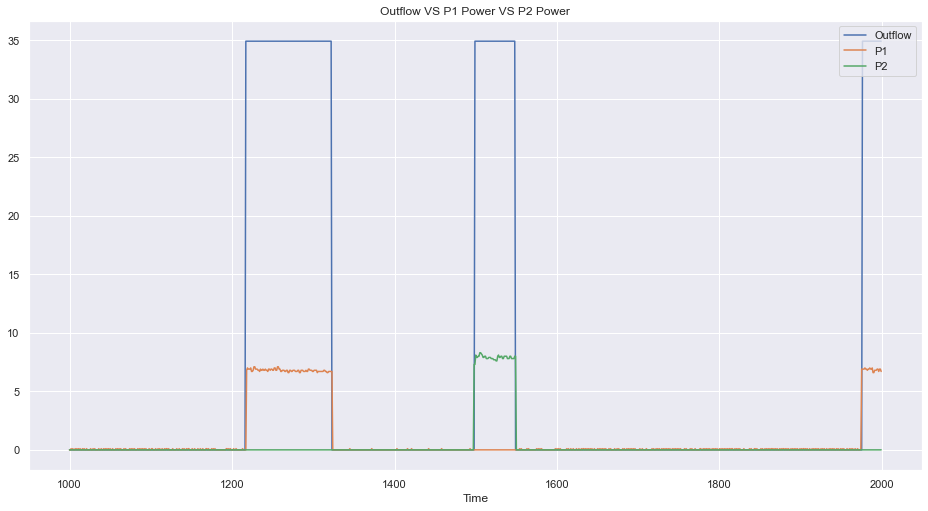

In [17]:
fig, ax = plt.subplots()
pump.Outflow[1000:2000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Power_P1"][1000:2000].plot()
pump["Power_P2"][1000:2000].plot()
ax.legend(["Outflow","P1", "P2"], loc="upper right")
ax.set_xlabel("Time")

# Outflow vs Water Height
Looks good

Text(0.5, 0, 'Time')

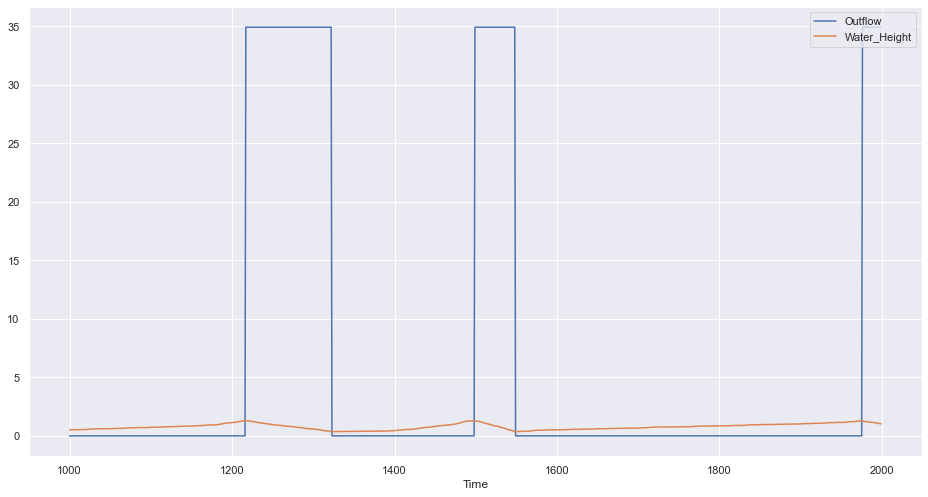

In [18]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
pump["Outflow"][1000:2000].plot()
pump["Water_Height"][1000:2000].plot()
# PST237["Effect_P2"][1000:2000].plot()
ax.legend(["Outflow","Water_Height"], loc="upper right")
ax.set_xlabel("Time")

# General Findings
- Dates seems very unevenly distributed
- Outflow seems very static, only takes two values, 0 or 34.92. 
- Pump one stays at 0.1 instead of going to 0

In [19]:

profile = ProfileReport(pump, title="Pandas Profiling Report",  explorative=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


In [22]:
pump[(pump.Power_P1 > 0) & (pump.Power_P2 > 0)]

,DateTime,Power_P1,Power_P2,Water_Height,Outflow,Volume
808,2021-08-01 17:45:51.564,0.1,7.9,1.29,0.00,1270.912458
809,2021-08-01 17:45:51.626,0.1,7.9,1.29,34.92,1270.912458
811,2021-08-01 17:46:16.072,0.1,7.8,1.29,34.92,1270.912458
812,2021-08-01 17:46:16.196,0.1,7.8,1.24,34.92,1221.652286
825,2021-08-01 17:48:07.206,0.1,7.4,1.00,34.92,985.203456
...,...,...,...,...,...,...
24648,2021-08-24 18:52:37.619,0.1,9.5,0.71,34.92,699.494454
24649,2021-08-24 18:52:37.682,0.1,9.5,0.66,34.92,650.234281
29141,2021-08-31 19:45:11.481,0.1,7.8,1.08,34.92,1064.019733
29171,2021-08-31 19:49:13.421,0.1,8.0,0.45,34.92,443.341555
